In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Models
from sklearn.ensemble import IsolationForest

df = pd.read_csv('Output.csv', encoding='windows-1252')
df.index = pd.to_datetime(df['DATE'])
df = df.drop('DATE', 1)
df.head()

C:\Users\ataka\AppData\Local\Temp\ipykernel_21112\1700691037.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('DATE', 1)


,Count
DATE,
2015-06-15,249
2015-06-16,249
2015-06-17,234
2015-06-18,294
2015-06-19,289


In [49]:
x = df.values
clf = IsolationForest(contamination=.25)
predictions = clf.fit_predict(x)
decision = clf.decision_function(x)
df['test'] = decision
df.head()

,Count,test
DATE,,
2015-06-15,249,0.030893
2015-06-16,249,0.030893
2015-06-17,234,-0.024375
2015-06-18,294,0.024838
2015-06-19,289,0.030141


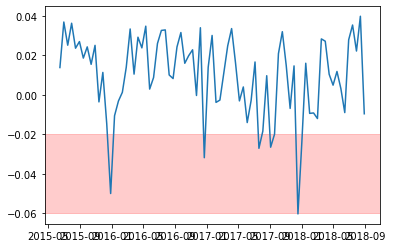

In [67]:
plt.plot(df['test'].resample('15D').mean())
plt.axhspan(-.06, -.02, alpha=0.2, color='red')